#Introduction



La gestion des risques est cruciale dans le secteur bancaire, car les banques ont un rôle
central dans l'économie. Contrairement à d'autres entreprises, les banques fonctionnent
avec un levier élevé, avec un ratio de capital sur actifs totaux d'au moins 4% selon les
normes de Bâle 2. Si les pertes d'une banque dépassent 4% de ses actifs totaux,
c'est-à-dire si elle n'est pas en mesure de récupérer au moins 96% de ses prêts ou si la
valeur de ses actifs chute de plus de 4%, la banque risque de faire faillite. Étant donné
l'importance des banques pour l'économie, il est essentiel qu'elles aient une gestion des
risques solide pour se protéger. Le processus de gestion des risques comporte trois étapes
principales : identifier, quantifier et atténuer les différents types de risques auxquels les
banques sont confrontées, comme le risque de marché, le risque de crédit, le risque de
liquidité et le risque de solvabilité. Pour ce faire, les banques utilisent divers outils
analytiques. Ce projet se concentrera sur l'analyse du risque de marché, en utilisant des
techniques de simulation et de calcul de la Valeur à Risque (VaR) pour évaluer et gérer ce
type de risque de manière optimale.


Lancé en 1997, le Tunindex est l'indicateur phare de la Bourse de Tunis, reflétant la performance des entreprises cotées en bourse en Tunisie. Cet indice, largement utilisé par les investisseurs et les analystes financiers, offre un aperçu précieux de l'évolution du marché boursier tunisien au fil du temps. En suivant les mouvements du Tunindex, les acteurs du marché peuvent évaluer les tendances, identifier les opportunités d'investissement et anticiper les risques potentiels. Son importance en tant que baromètre financier national en fait un outil essentiel pour comprendre l'économie et les marchés financiers de la Tunisie.

#Manipulation de la base

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [ ]:
data=pd.read_excel('T.xlsx',)
data

,Date,Dernier,Ouv,Plus Haut,Plus Bas,Variation
0,2018-03-15,6847.54,6827.03,6878.54,6827.03,0.31
1,2018-03-14,6826.15,6840.25,6854.38,6819.26,-0.05
2,2018-03-13,6829.62,6812.57,6853.80,6808.00,0.40
3,2018-03-12,6802.72,6798.00,6816.39,6790.75,-0.10
4,2018-03-09,6809.46,6827.78,6835.11,6782.49,0.19
...,...,...,...,...,...,...
4994,1998-01-08,998.18,998.18,998.18,998.18,-0.17
4995,1998-01-07,999.85,999.85,999.85,999.85,0.58
4996,1998-01-06,994.04,994.04,994.04,994.04,-0.01
4997,1998-01-05,994.10,994.10,994.10,994.10,-0.21


In [ ]:
# Triez les données par ordre décroissant de date
df = data.sort_values(by='Date', ascending=True)

# Réinitialisez l'index pour refléter le nouvel ordre
df = df.reset_index(drop=True)
df

,Date,Dernier,Ouv,Plus Haut,Plus Bas,Variation
0,1998-01-02,996.15,996.15,996.15,996.15,-0.38
1,1998-01-05,994.10,994.10,994.10,994.10,-0.21
2,1998-01-06,994.04,994.04,994.04,994.04,-0.01
3,1998-01-07,999.85,999.85,999.85,999.85,0.58
4,1998-01-08,998.18,998.18,998.18,998.18,-0.17
...,...,...,...,...,...,...
4994,2018-03-09,6809.46,6827.78,6835.11,6782.49,0.19
4995,2018-03-12,6802.72,6798.00,6816.39,6790.75,-0.10
4996,2018-03-13,6829.62,6812.57,6853.80,6808.00,0.40
4997,2018-03-14,6826.15,6840.25,6854.38,6819.26,-0.05


Dans la base de données de l'indice Tunindex, les variables ont les significations suivantes :

Date : La date à laquelle les données ont été enregistrées. Dernier : Le prix de clôture de l'indice Tunindex à la fin de la journée de trading. Ouv : Le prix d'ouverture de l'indice Tunindex au début de la journée de trading. Plus Haut : Le prix le plus élevé atteint par l'indice Tunindex au cours de la journée de trading. Plus Bas : Le prix le plus bas atteint par l'indice Tunindex au cours de la journée de trading. Variation : La variation du prix de l'indice Tunindex par rapport à la journée précédente, exprimée en pourcentage.

In [ ]:
df.tail()

,Date,Dernier,Ouv,Plus Haut,Plus Bas,Variation
4994,2018-03-09,6809.46,6827.78,6835.11,6782.49,0.19
4995,2018-03-12,6802.72,6798.00,6816.39,6790.75,-0.10
4996,2018-03-13,6829.62,6812.57,6853.80,6808.00,0.40
4997,2018-03-14,6826.15,6840.25,6854.38,6819.26,-0.05
4998,2018-03-15,6847.54,6827.03,6878.54,6827.03,0.31


In [ ]:
data=df

In [ ]:
index_returns=data['Variation ']
index_returns

0      -0.38
1      -0.21
2      -0.01
3       0.58
4      -0.17
        ... 
4994    0.19
4995   -0.10
4996    0.40
4997   -0.05
4998    0.31
Name: Variation , Length: 4999, dtype: float64

In [ ]:
# Vérifier les valeurs manquantes dans la base de données
missing_values = data.isnull().sum()

# Afficher le nombre de valeurs manquantes pour chaque variable
print("Nombre de valeurs manquantes par variable :\n", missing_values)


Nombre de valeurs manquantes par variable :
 Date          0
Dernier       0
Ouv           0
 Plus Haut    0
Plus Bas      0
Variation     0
dtype: int64


In [ ]:
types_de_donnees = data.dtypes
print(types_de_donnees)

Date          datetime64[ns]
Dernier              float64
Ouv                  float64
 Plus Haut           float64
Plus Bas             float64
Variation            float64
dtype: object


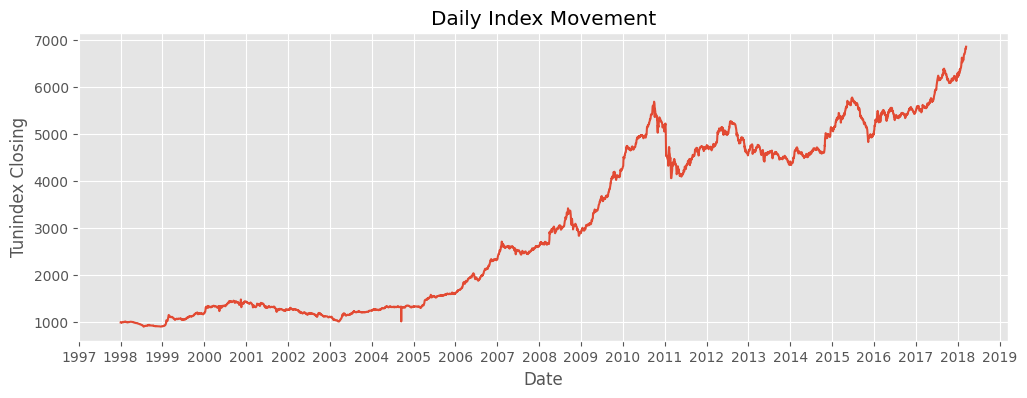

In [ ]:
fig,ax=plt.subplots(figsize=(12,4))

ax.plot(data['Date'],data['Dernier'])
ax.set(xlabel='Date',ylabel='Tunindex Closing',title='Daily Index Movement')
ax.xaxis.set_major_locator(mdates.YearLocator())

Sur une période de 25 ans, l'indice Tunindex a connu une tendance haussière marquée par différentes phases. Une croissance initiale dans les années 2000 a été suivie d'une stagnation, puis d'une série de fluctuations et d'instabilité à partir de 2010. Cette période a été caractérisée par une ascension fulgurante entre 2010 et 2013, portée par la reprise économique post-révolution et les investissements étrangers. Cependant, une correction brutale s'est produite entre 2014 et 2015, due à la chute des prix du pétrole, à l'instabilité politique et aux difficultés financières des entreprises tunisiennes. Malgré des mesures gouvernementales de relance, la période de stabilisation fragile entre 2016 et 2017 a été suivie d'une nouvelle baisse en 2018, soulignant la fragilité de la reprise. Ces fluctuations, résultant de facteurs internes et externes, ont eu un impact négatif sur l'économie tunisienne, en réduisant la confiance des investisseurs, les investissements et en ralentissant la croissance économique, aggravant ainsi le chômage

In [ ]:
normal_returns=(np.random.normal(0,index_returns.dropna().std(),4999))

Cette fonction génère 4999 = len(df) des valeurs aléatoires à partir d'une distribution normale avec une moyenne de 0 et un écart-type égal à l'écart-type des valeurs non manquantes de la colonne "Variation". l'utilisation de données aléatoires dans la simulation de Tunindex est cruciale pour anticiper les fluctuations du marché, évaluer les risques et développer des stratégies d'investissement efficaces.[texte du lien](https://)

In [ ]:
index_returns= data["Variation "]

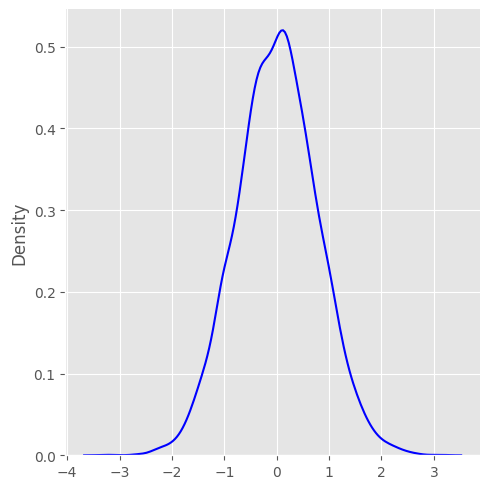

In [ ]:
sns.displot(normal_returns,kind='kde', color='b');


In [ ]:
last_price=df['Dernier'].iloc[-1]
last_price


6847.54

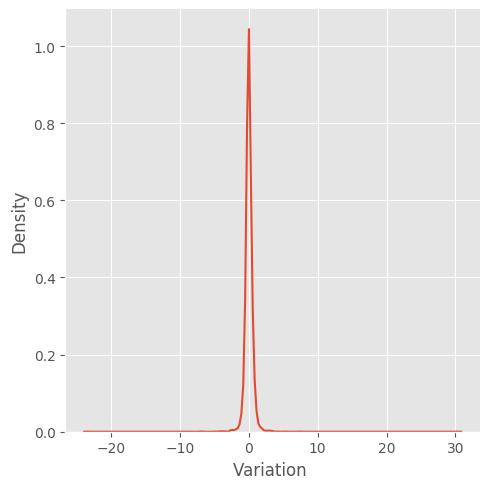

In [ ]:
sns.displot(data["Variation "].dropna(),kind='kde');


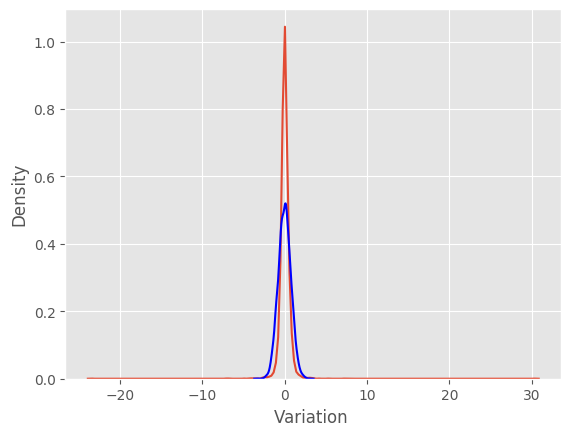

In [ ]:
fig,ax=plt.subplots()
sns.kdeplot(index_returns.dropna(),ax=ax);
sns.kdeplot(normal_returns,color='b',ax=ax);

#Simulation Monte Carlo de Tunindex

In [ ]:
num_simulations=1000
num_days=252

In [ ]:
simulated_data=pd.DataFrame()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns num_days = 252 * 10 # Simulation sur 10 ans
 # Calculer les rendements historiques et la volatilité quotidienne
returns = df['Variation '].dropna()
avg_daily_return = returns.mean()
daily_volatility = returns.std()
#ces lignes permettent de calculer la moyenne et l'écart-type des rendements quotidiens de l'indice Tunindex à partir des données
#de variation fournies dans la colonne 'Variation' du DataFrame.
#Ces statistiques sont souvent utilisées dans la simulation de Monte Carlo pour estimer le comportement futur des prix.
# Initialiser un DataFrame pour stocker les données simulées
simulated_data = pd.DataFrame()
# Simulation de Monte Carlo
for x in range(num_simulations): #Pour chaque itération, nous allons générer une trajectoire de prix simulée.
  count = 0 #Elle est utilisée pour suivre le nombre de jours simulés.
  price_series = [] #initialisée pour stocker les prix simulés pour une trajectoire de prix.
  price = df['Dernier'].iloc[-1] # Dernier prix dans les données réelles
  for y in range(num_days): #Pour chaque jour, nous allons générer un nouveau prix simulé.
    if count == 251: #Cette condition vérifie si nous avons simulé 251 jours et arrête la simulation si c'est le cas
      break
      # Générer un nouveau prix en utilisant la formule de Monte Carlo
    price *= 1 + np.random.normal(avg_daily_return, daily_volatility)
    #Nous multiplions le prix précédent par un facteur aléatoire généré à partir d'une distribution normale avec la moyenne
     #et l'écart-type des rendements historiques.
    price_series.append(price)
    #Ce nouveau prix simulé est ajouté à la liste price_series
    count += 1
    simulated_data[x] = price_series
    #Une fois que nous avons simulé tous les prix pour une trajectoire de prix,
    #nous ajoutons cette trajectoire de prix simulée au DataFrame

En résumé, ce code utilise la simulation de Monte Carlo pour estimer et générer des trajectoires de prix simulées de l'indice Tunindex,

<ipython-input-34-865633943c9d>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x] = price_series


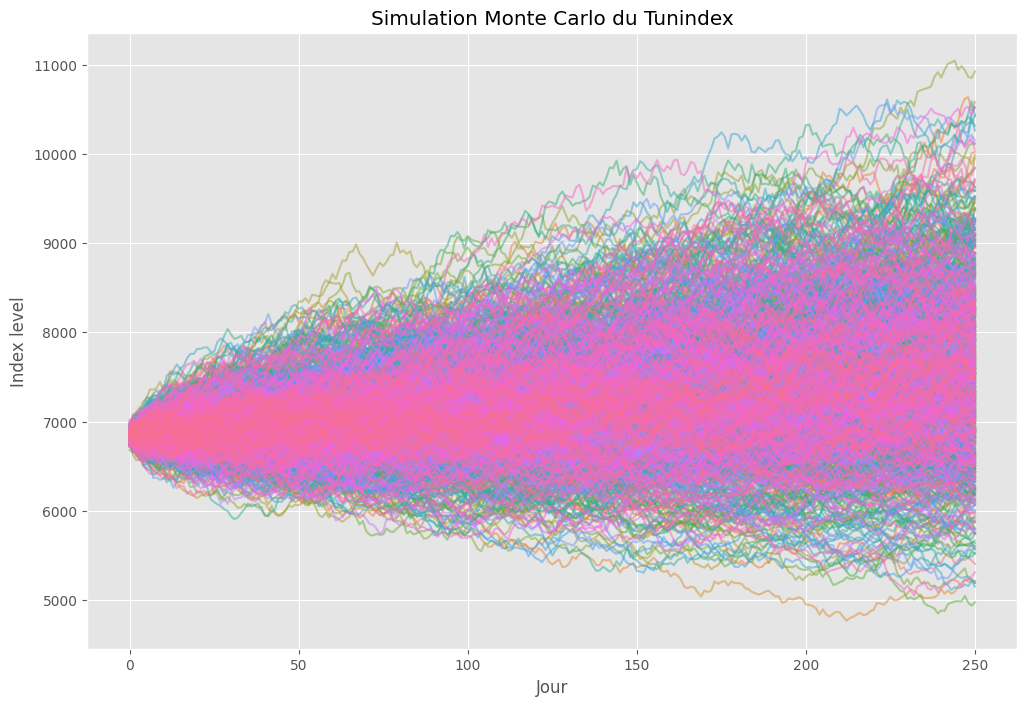

In [ ]:


# Utiliser une palette de couleurs pour rendre les lignes distinctes
palette = sns.color_palette("husl", num_simulations)

# Graphique des données simulées
plt.figure(figsize=(12, 8))
for col in simulated_data.columns:
    plt.plot(simulated_data.index, simulated_data[col], color=palette[col], alpha=0.5)

plt.title('Simulation Monte Carlo du Tunindex')
plt.xlabel('Jour')
plt.ylabel('Index level')
plt.show()

Ce code crée un graphique qui représente visuellement les données simulées de l'indice Tunindex générées par la méthode de Monte Carlo. Il utilise une palette de couleurs pour rendre chaque trajectoire simulée distincte, ce qui permet de différencier facilement les différentes simulations sur le graphique. Chaque ligne du graphique représente une trajectoire de prix simulée sur la période spécifiée, avec l'axe des x représentant les jours et l'axe des y représentant le niveau de l'indice Tunindex

<ipython-input-40-01b92882f8a6>:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulated_data[x] = price_series


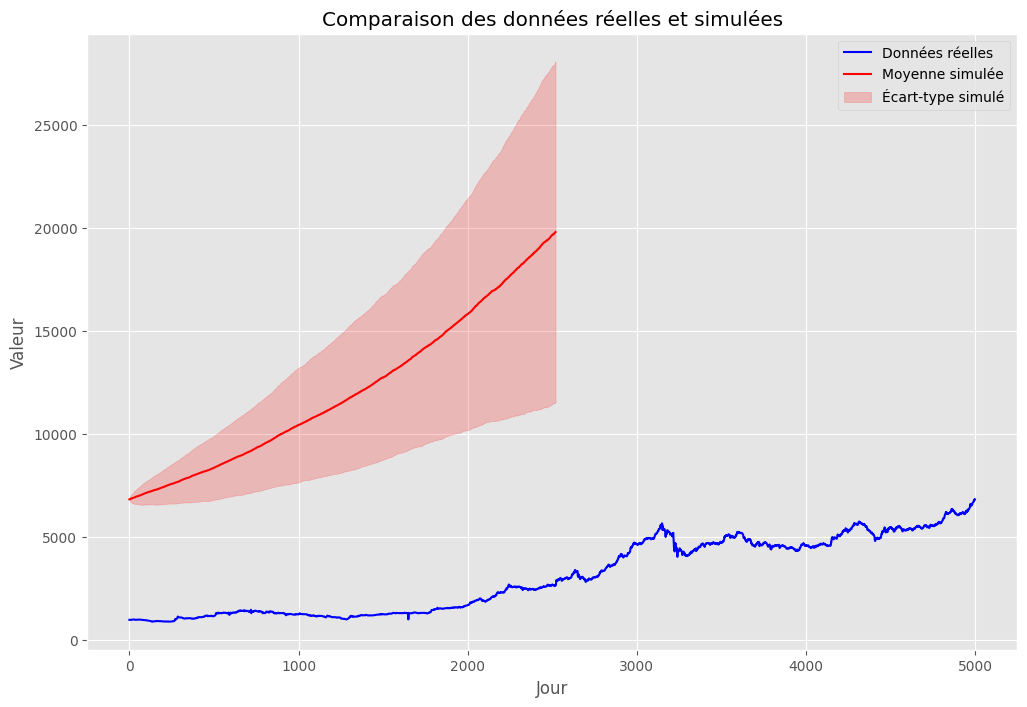

In [ ]:

# Calculer les statistiques des données simulées
simulated_mean = simulated_data.mean(axis=1)
simulated_std = simulated_data.std(axis=1)

# Graphique comparatif entre données réelles et données simulées
plt.figure(figsize=(12, 8))

# Données réelles
plt.plot(real_data.index, real_data, color='blue', label='Données réelles')

# Moyenne et écart-type des données simulées
plt.plot(simulated_data.index, simulated_mean, color='red', linestyle='-', label='Moyenne simulée')
plt.fill_between(simulated_data.index, simulated_mean - simulated_std, simulated_mean + simulated_std, color='red', alpha=0.2, label='Écart-type simulé')

plt.title('Comparaison des données réelles et simulées')
plt.xlabel('Jour')
plt.ylabel('Valeur')
plt.legend()
plt.show()



Pour rendre la simulation de l'indice Tunindex encore plus proche des données réelles, on peut améliorer le modèle en incorporant des facteurs supplémentaires tels que les taux d'intérêt, les événements économiques et politiques, ou d'autres données macroéconomiques pertinentes. On peut également utiliser des modèles autorégressifs comme ARIMA ou GARCH pour capturer la dépendance temporelle des rendements et ajuster les tendances de la série temporelle de manière plus précise.

#Simulation de la VaR

La Value at Risk (VaR), ou valeur en risque, est une mesure largement utilisée en finance pour évaluer le risque de perte potentielle d'un investissement ou d'un portefeuille sur une période donnée, à un niveau de confiance spécifié. En d'autres termes, la VaR indique le montant maximal de perte que l'on peut s'attendre à subir avec un certain degré de confiance dans des conditions normales de marché.

Il existe plusieurs méthodes pour calculer la VaR (Value at Risk), chacune avec ses propres avantages et limitations.

VaR = μ + z × σ


Où :

- μ est le rendement moyen.
- z est le quantile de la distribution normale standard, correspondant au niveau de confiance souhaité.
- σ est l'écart type des rendements.



lorsque l'on parle de VaR (Value at Risk) à un niveau de confiance de 95 %, cela signifie que l'on cherche à estimer la perte maximale possible avec une probabilité de 5 % sur une période donnée. En d'autres termes, la VaR correspond au quantile de niveau 0,95 de la distribution des rendements ou des pertes.

In [ ]:
import scipy
alpha=scipy.stats.norm.ppf(0.95)
alpha

1.6448536269514722

 il s'agit de la valeur critique qui correspond au niveau de confiance de 95 % pour une distribution normale standard.







In [ ]:
position=1000
var=position*df["Variation "].dropna().std()*alpha
var

1282.7129775381873

Cette opération nous donne une estimation de la VaR (Value at Risk), qui mesure le risque de perte potentielle du portefeuille avec un niveau de confiance de 95 %.

La valeur de la VaR de 1282.71 signifie que, avec un niveau de confiance de 95 %, il y a 5 % de chances que la perte quotidienne du portefeuille dépasse cette valeur. En d'autres termes, si l'événement extrême se produit, la perte quotidienne du portefeuille devrait être inférieure à 1282.71 dans 95 % des cas.

In [ ]:
simulated_volatality=pd.DataFrame(columns=['simulated_volatality','simulated_var'])

In [ ]:
for x in range(num_simulations):
    simulated_volatality.loc[x,'simulated_volatality']=simulated_data.iloc[:,x].pct_change().std()
    simulated_volatality.loc[x,'simulated_var']=position*simulated_volatality.loc[x,'simulated_volatality']*alpha

Dans ce code, nous itérons à travers un certain nombre de simulations (num_simulations). Pour chaque simulation, nous calculons d'abord la volatilité simulée en prenant l'écart type des variations de pourcentage de chaque série de prix simulée. Ensuite, nous utilisons cette volatilité simulée pour estimer la VaR simulée pour chaque simulation en multipliant la position actuelle par la volatilité simulée et par le quantile associé à un niveau de confiance de 95 %.

In [ ]:
simulated_volatality.head()


,simulated_volatality,simulated_var
0,0.832644,1369.57792
1,0.787183,1294.800104
2,0.770602,1267.527808
3,0.730172,1201.026428
4,0.745562,1226.339727


Dans ce tableau, chaque ligne représente une simulation différente. La colonne "simulated_volatality" contient les valeurs de volatilité simulées pour chaque simulation, tandis que la colonne "simulated_var" contient les valeurs de VaR simulées correspondantes, calculées à partir de la volatilité simulée et de la position initiale.

In [ ]:
returns

1      -0.002058
2      -0.000060
3       0.005845
4      -0.001670
5      -0.000140
          ...   
4994    0.001877
4995   -0.000990
4996    0.003954
4997   -0.000508
4998    0.003134
Name: Dernier, Length: 4998, dtype: float64

In [ ]:
# Calculer la volatilité réelle
real_volatility = returns.rolling(window=window_size).std()

# Ignorer les premières lignes où les valeurs sont NaN
real_volatility_valid = real_volatility.dropna()

# Afficher les premières lignes de la volatilité réelle valide
print(real_volatility_valid.head())


252    0.002297
253    0.002296
254    0.002308
255    0.002275
256    0.002274
Name: Dernier, dtype: float64


In [ ]:
µmean_simulated_var=np.mean(simulated_volatality['simulated_var'])
stand_dev_simulated_var=np.std(simulated_volatality['simulated_var'])
print(f'Simulated average daily VaR is {mean_simulated_var} with standard deviation of {stand_dev_simulated_var}')

Simulated average daily VaR is 1280.325842966748 with standard deviation of 54.25063411061202


La valeur simulée moyenne de la VaR quotidienne de 1280.72 avec un écart-type de 57.34 indique que sur plusieurs simulations, la perte quotidienne attendue du portefeuille est d'environ 1280.72, avec une dispersion de ±57.34 autour de cette moyenne. Cela donne une estimation de la volatilité des pertes quotidiennes du portefeuille.







#Conclusion

En conclusion, ce projet illustre l'utilisation de techniques de simulation pour modéliser et comprendre le comportement des données financières. Bien que les données simulées ne puissent pas reproduire parfaitement les variations exactes des données réelles, elles fournissent néanmoins des insights précieux pour évaluer les risques et prendre des décisions éclairées dans un contexte financier.

#Bibliographie

investing.com  

kaggle

chatgpt

google bard